In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Using cached scipy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn import datasets

In [30]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [5]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X= iris.data
Y = iris.target

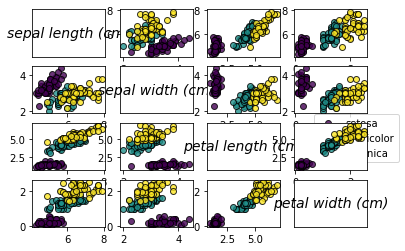

In [32]:
targets = iris.target_names
n_targets = len(targets)
features = iris.feature_names
n_features = len(features)
# Plot pairs of variables
cmap = cm.get_cmap('viridis')
fig, axs = plt.subplots(n_features, n_features)
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            for k in range(n_targets):
                axs[i, j].scatter(X[Y==k,j], X[Y==k,i], label = targets[k], color =
cmap(k/(n_targets-1)), 
                                  alpha=0.8, edgecolor='k')
        else:
            axs[i, j].text(0.5, 0.5, features[i], horizontalalignment='center', 
                           verticalalignment='center', style='italic', fontsize=14)
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)
           
axs[n_features//2 - 1, n_features-1].legend(bbox_to_anchor=(1.5, 0.1))
plt.subplots_adjust(right=0.90)
plt.show()

In [10]:
from sklearn import svm

In [12]:
clf = svm.SVC(kernel = 'linear')
clf

SVC(kernel='linear')

In [14]:
clf.fit(X,Y)

SVC(kernel='linear')

In [16]:
clf.predict([[1,2,3,4]])

array([2])

In [17]:
import numpy as np

In [18]:
obs = np.random.rand(10,4)
obs

array([[0.1410255 , 0.65676717, 0.85173209, 0.6942462 ],
       [0.71765851, 0.96580116, 0.5669903 , 0.18325701],
       [0.61754717, 0.60104133, 0.85814922, 0.78406615],
       [0.17088384, 0.74468951, 0.59690153, 0.47757736],
       [0.07594845, 0.16893025, 0.12447234, 0.77009814],
       [0.67952474, 0.1100749 , 0.04733054, 0.71986385],
       [0.4134268 , 0.70011104, 0.20954088, 0.22070688],
       [0.55781862, 0.17180054, 0.11199282, 0.2967757 ],
       [0.24195532, 0.02771131, 0.61888223, 0.76192805],
       [0.55782877, 0.76707967, 0.81984672, 0.84315573]])

In [19]:
clf.predict(obs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [22]:
kf = StratifiedKFold(n_splits = 10, shuffle = True)

In [28]:
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

In [52]:
acc = 0
for train_idx, test_idx in kf.split(X, Y):
    x_train, y_train = X[train_idx, :], Y[train_idx]
    clf.fit(x_train, y_train)
    
    x_test, y_test = X[test_idx, :], Y[test_idx]
    y_pred = clf.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print("MATRIZ DE CONFUSION:", cm)
    
    recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
    recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
    recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])
    
    precision[0] += cm[0,0]/(cm[0,0] + cm[1,0] + cm[2,0])
    precision[1] += cm[1,1]/(cm[0,1] + cm[1,1] + cm[2,1])
    precision[2] += cm[2,2]/(cm[0,2] + cm[1,2] + cm[2,2])
    
    acc += (cm[0, 0] + cm[1, 1]+ cm[2,2]) / len(y_test)
    
acc/=10

precision = precision/10

print('Precision: ', precision)

recall = recall/10

print('Recall: ', recall)

print("Exactitud final:", acc)

MATRIZ DE CONFUSION: [[6 0 0]
 [0 6 1]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 7 0]
 [0 1 4]]
MATRIZ DE CONFUSION: [[6 0 0]
 [1 6 0]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 7 0]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 7 0]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 7 0]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 6 1]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 6 1]
 [0 0 5]]
MATRIZ DE CONFUSION: [[6 0 0]
 [0 7 0]
 [0 0 4]]
MATRIZ DE CONFUSION: [[4 1 0]
 [0 8 0]
 [0 0 4]]
Precision:  [1.09397976 1.08244972 1.05567548]
Recall:  [1.08924667 1.04618507 1.086608  ]
Exactitud final: 0.9663398692810456


# Pregunta 2

In [41]:
wine_dataset = datasets.load_wine()
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [37]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [36]:
len(wine_dataset.feature_names)

13

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
svm_lineal = svm.SVC(kernel='linear')
svm_radial = svm.SVC(kernel='rbf')
k_neigh = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier()

In [131]:
def get_model_accuracy_kfold(model, k, X, Y):
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    acc = 0
    for train_idx, test_idx in kf.split(X, Y):
        x_train, y_train = X[train_idx, :], Y[train_idx]
        model.fit(x_train, y_train)

        x_test, y_test = X[test_idx, :], Y[test_idx]
        y_pred = model.predict(x_test)

        cm = confusion_matrix(y_test, y_pred)
        
        #print(cm)
        
        #print(len(cm))
        acum = 0
        for i in range(len(cm)):
            acum+=cm[i,i]
        acc+=(acum)/len(y_test)

        #acc += (cm[0, 0] + cm[1, 1]+ cm[2,2]) / len(y_test)

    acc/=k
    
    return acc

In [133]:
X, Y = wine_dataset.data, wine_dataset.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [134]:
models = {svm_lineal:'svm lineal', svm_radial:'svm_radial', k_neigh:'K Neightbors (K=5)', decision_tree:'Arbol de decisión'}

for model in models:
    print("MODELO: ", models[model])
    model_acc = get_model_accuracy_kfold(model, 5, X, Y)
    print("ACCURACY:",model_acc)

MODELO:  svm lineal
ACCURACY: 0.9550793650793651
MODELO:  svm_radial
ACCURACY: 0.6853968253968253
MODELO:  K Neightbors (K=5)
ACCURACY: 0.6857142857142857
MODELO:  Arbol de decisión
ACCURACY: 0.8709523809523809


## Se obtuvo mejor resultado con el SVM lineal

# Problema 3

In [135]:
with open('misterious_data_1.txt', 'r') as f:
    c=0
    Y_arr = []
    X_arr = []
    for line in f.readlines():
        elementos = line.split('\t')
        #print(elementos[0])
        Y_arr.append(elementos[0])
        X_arr.append(elementos[1:])
    
    X,Y = np.array(X_arr), np.array(Y_arr)

In [122]:
linear_svm = svm.SVC(kernel='linear')

In [136]:
accur = get_model_accuracy_kfold(linear_svm, 5, X, Y)
print("Accuracy", accur)

Accuracy 0.7766576819407007


# Problema 4

In [138]:
with open('misterious_data_2.txt', 'r') as f:
    c=0
    Y_arr = []
    X_arr = []
    for line in f.readlines():
        elementos = line.split('\t')
        #print(elementos[0])
        Y_arr.append(int(elementos[0]))
        X_arr.append(list(map(float,elementos[1:])))
    
    X2,Y2 = np.array(X_arr), np.array(Y_arr)
Y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [116]:
all_k = np.arange(1,41,1)
all_k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [114]:
reg_factors = np.arange(0.000001, 0.0001, 0.000001)
reg_factors

array([1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06, 7.0e-06,
       8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05, 1.4e-05,
       1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05, 2.0e-05, 2.1e-05,
       2.2e-05, 2.3e-05, 2.4e-05, 2.5e-05, 2.6e-05, 2.7e-05, 2.8e-05,
       2.9e-05, 3.0e-05, 3.1e-05, 3.2e-05, 3.3e-05, 3.4e-05, 3.5e-05,
       3.6e-05, 3.7e-05, 3.8e-05, 3.9e-05, 4.0e-05, 4.1e-05, 4.2e-05,
       4.3e-05, 4.4e-05, 4.5e-05, 4.6e-05, 4.7e-05, 4.8e-05, 4.9e-05,
       5.0e-05, 5.1e-05, 5.2e-05, 5.3e-05, 5.4e-05, 5.5e-05, 5.6e-05,
       5.7e-05, 5.8e-05, 5.9e-05, 6.0e-05, 6.1e-05, 6.2e-05, 6.3e-05,
       6.4e-05, 6.5e-05, 6.6e-05, 6.7e-05, 6.8e-05, 6.9e-05, 7.0e-05,
       7.1e-05, 7.2e-05, 7.3e-05, 7.4e-05, 7.5e-05, 7.6e-05, 7.7e-05,
       7.8e-05, 7.9e-05, 8.0e-05, 8.1e-05, 8.2e-05, 8.3e-05, 8.4e-05,
       8.5e-05, 8.6e-05, 8.7e-05, 8.8e-05, 8.9e-05, 9.0e-05, 9.1e-05,
       9.2e-05, 9.3e-05, 9.4e-05, 9.5e-05, 9.6e-05, 9.7e-05, 9.8e-05,
       9.9e-05, 1.0e

In [109]:
kernel_gamma_factors = np.arange(0.000001, 0.0002, 0.000001)
kernel_gamma_factors

array([1.00e-06, 2.00e-06, 3.00e-06, 4.00e-06, 5.00e-06, 6.00e-06,
       7.00e-06, 8.00e-06, 9.00e-06, 1.00e-05, 1.10e-05, 1.20e-05,
       1.30e-05, 1.40e-05, 1.50e-05, 1.60e-05, 1.70e-05, 1.80e-05,
       1.90e-05, 2.00e-05, 2.10e-05, 2.20e-05, 2.30e-05, 2.40e-05,
       2.50e-05, 2.60e-05, 2.70e-05, 2.80e-05, 2.90e-05, 3.00e-05,
       3.10e-05, 3.20e-05, 3.30e-05, 3.40e-05, 3.50e-05, 3.60e-05,
       3.70e-05, 3.80e-05, 3.90e-05, 4.00e-05, 4.10e-05, 4.20e-05,
       4.30e-05, 4.40e-05, 4.50e-05, 4.60e-05, 4.70e-05, 4.80e-05,
       4.90e-05, 5.00e-05, 5.10e-05, 5.20e-05, 5.30e-05, 5.40e-05,
       5.50e-05, 5.60e-05, 5.70e-05, 5.80e-05, 5.90e-05, 6.00e-05,
       6.10e-05, 6.20e-05, 6.30e-05, 6.40e-05, 6.50e-05, 6.60e-05,
       6.70e-05, 6.80e-05, 6.90e-05, 7.00e-05, 7.10e-05, 7.20e-05,
       7.30e-05, 7.40e-05, 7.50e-05, 7.60e-05, 7.70e-05, 7.80e-05,
       7.90e-05, 8.00e-05, 8.10e-05, 8.20e-05, 8.30e-05, 8.40e-05,
       8.50e-05, 8.60e-05, 8.70e-05, 8.80e-05, 8.90e-05, 9.00e

In [143]:
highest_acc = -1
best_k = 0

for k_val in all_k:
    current_model = KNeighborsClassifier(n_neighbors=k_val)
    current_accuracy = get_model_accuracy_kfold(current_model, 5, X2, Y2)

    if current_accuracy > highest_acc:
        highest_acc = current_accuracy
        best_k = k_val
        
print("BEST VALUE FOR K:", best_k, "WITH ACCURACY:", highest_acc)


BEST VALUE FOR K: 7 WITH ACCURACY: 0.9488436632747457


In [148]:
highest_acc = -1
best_reg = 0

for curr_reg in reg_factors:
    current_model = svm.SVC(kernel='linear', C=curr_reg)
    current_accuracy = get_model_accuracy_kfold(current_model, 5, X2, Y2)

    if current_accuracy > highest_acc:
        highest_acc = current_accuracy
        best_reg = curr_reg
        
print("BEST VALUE FOR REGULARIZATION FACTOR:", format(float(best_reg), 'f') , "WITH ACCURACY:", highest_acc)


BEST VALUE FOR REGULARIZATION FACTOR: 0.000092 WITH ACCURACY: 0.8717853839037927


In [149]:
highest_acc = -1
best_kernel_gamma_factor = 0

for curr_ker_gamma in kernel_gamma_factors:
    current_model = svm.SVC(kernel='rbf', gamma=curr_ker_gamma)
    current_accuracy = get_model_accuracy_kfold(current_model, 5, X2, Y2)

    if current_accuracy > highest_acc:
        highest_acc = current_accuracy
        best_kernel_gamma_factor = curr_ker_gamma
        
print("BEST VALUE FOR REGULARIZATION FACTOR:", format(float(best_kernel_gamma_factor), 'f') , "WITH ACCURACY:", highest_acc)


BEST VALUE FOR REGULARIZATION FACTOR: 0.000195 WITH ACCURACY: 0.9231267345050878
